# Entropy

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

from jupyterthemes import jtplot
jtplot.style(theme='onedork', figsize=(15, 9))

In [3]:
data = pd.read_csv('../data/lrcx_2022-1-1_2023-06-1_1h.csv', parse_dates=True, index_col=0)
data

,Open,High,Low,Close,Volume
Datetime,,,,,
2022-01-03 09:30:00-05:00,721.130005,731.059875,711.830017,721.275024,240660
2022-01-03 10:30:00-05:00,721.265015,722.219971,716.130005,718.112488,114249
2022-01-03 11:30:00-05:00,718.229980,721.174988,716.830017,720.200012,82818
2022-01-03 12:30:00-05:00,720.179993,720.799988,718.239990,718.821899,80495
2022-01-03 13:30:00-05:00,718.320984,723.260010,718.320984,722.974976,59261
...,...,...,...,...,...
2023-05-31 11:30:00-04:00,618.880005,622.960022,618.099976,620.500122,80556
2023-05-31 12:30:00-04:00,621.030029,622.664978,619.710022,622.609985,104813
2023-05-31 13:30:00-04:00,622.479980,624.710022,621.724976,623.099976,106904


In [4]:
batch = data[['Close', 'Volume']].iloc[:30]
close_mean = batch['Close'].mean()
volume_mean = batch['Volume'].mean()

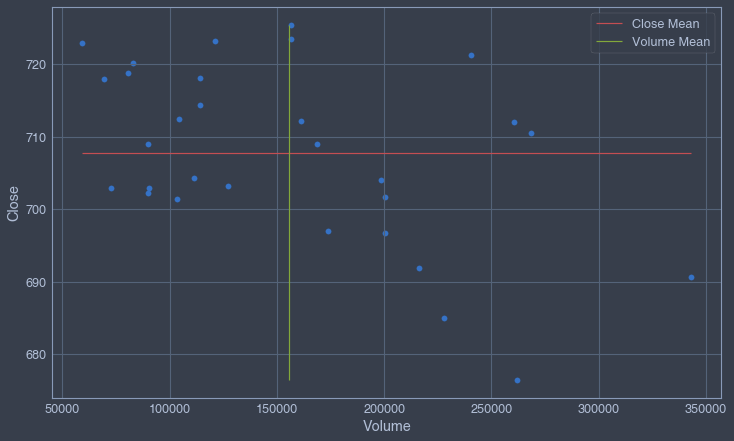

In [5]:
plt.hlines(close_mean,
           batch['Volume'].min(),
           batch['Volume'].max(),
           colors='r',
           label='Close Mean')
plt.vlines(volume_mean,
           batch['Close'].min(),
           batch['Close'].max(),
           colors='g',
           label='Volume Mean')
plt.scatter(batch['Volume'], batch['Close'])
plt.xlabel('Volume')
plt.ylabel('Close')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Close batch(30) | Volume batch(30)')

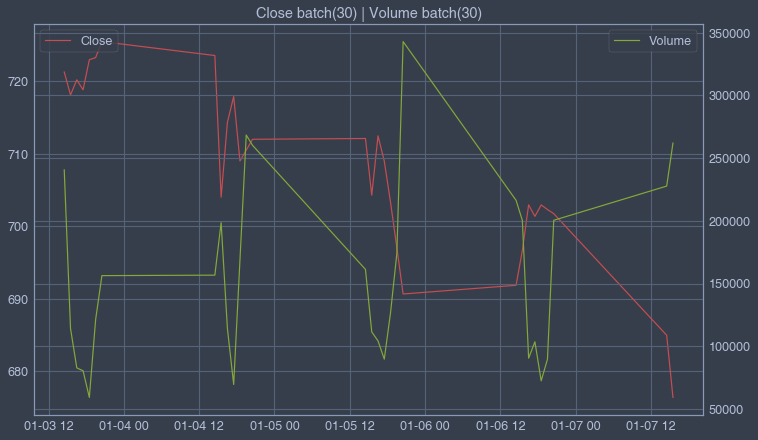

In [6]:
fig, ax = plt.subplots()
ax1 = ax.twinx()
ax.plot(batch['Close'], color='r', label='Close')
ax1.plot(batch['Volume'], color='g', label='Volume')
ax.legend(loc='upper left')
ax1.legend(loc='upper right')
ax.set_title('Close batch(30) | Volume batch(30)')

Text(0.5, 1.0, 'Close 30 mean | Volume 30 mean')

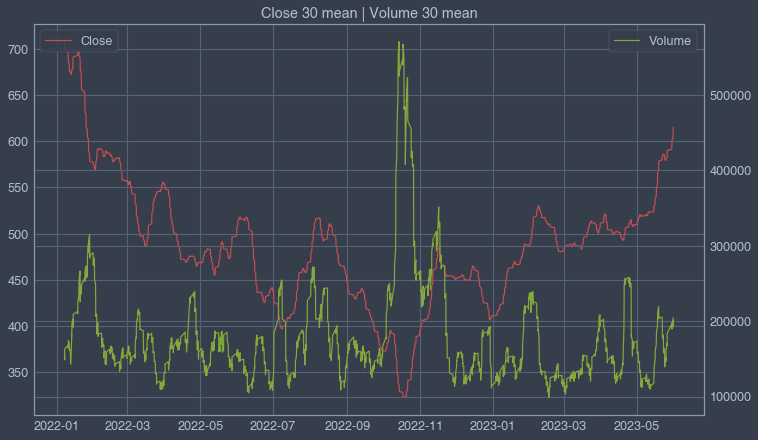

In [7]:
close_30_mean = data.rolling(30).mean().dropna()['Close']
volume_30_mean = data.rolling(30).mean().dropna()['Volume']

fig, ax = plt.subplots()
ax1 = ax.twinx()
ax.plot(close_30_mean, color='r', label='Close')
ax1.plot(volume_30_mean, color='g', label='Volume')
ax.legend(loc='upper left')
ax1.legend(loc='upper right')
ax.set_title('Close 30 mean | Volume 30 mean')

In [8]:
batch

,Close,Volume
Datetime,,
2022-01-03 09:30:00-05:00,721.275024,240660
2022-01-03 10:30:00-05:00,718.112488,114249
2022-01-03 11:30:00-05:00,720.200012,82818
2022-01-03 12:30:00-05:00,718.821899,80495
2022-01-03 13:30:00-05:00,722.974976,59261
2022-01-03 14:30:00-05:00,723.260010,121219
2022-01-03 15:30:00-05:00,725.469971,156362
2022-01-04 09:30:00-05:00,723.549988,156737
2022-01-04 10:30:00-05:00,704.015015,198631


In [9]:
close_mean, volume_mean

(707.7194295247396, 155534.36666666667)

In [10]:
batch['class'] = None

In [11]:
batch

,Close,Volume,class
Datetime,,,
2022-01-03 09:30:00-05:00,721.275024,240660,None
2022-01-03 10:30:00-05:00,718.112488,114249,None
2022-01-03 11:30:00-05:00,720.200012,82818,None
2022-01-03 12:30:00-05:00,718.821899,80495,None
2022-01-03 13:30:00-05:00,722.974976,59261,None
2022-01-03 14:30:00-05:00,723.260010,121219,None
2022-01-03 15:30:00-05:00,725.469971,156362,None
2022-01-04 09:30:00-05:00,723.549988,156737,None
2022-01-04 10:30:00-05:00,704.015015,198631,None


In [12]:
# batch = data[['Close', 'Volume']].iloc[:30]

In [13]:
def set_class(row):
    if row['Close'] > close_mean:
        if row['Volume'] > volume_mean:
            return 'HC_HV'
        else:
            return 'HC_LV'
    elif row['Volume'] > volume_mean:
        return 'LC_HV'
    else:
        return 'LC_LV'

In [14]:
batch['class'] = batch.apply(set_class, axis=1)

In [15]:
batch

,Close,Volume,class
Datetime,,,
2022-01-03 09:30:00-05:00,721.275024,240660,HC_HV
2022-01-03 10:30:00-05:00,718.112488,114249,HC_LV
2022-01-03 11:30:00-05:00,720.200012,82818,HC_LV
2022-01-03 12:30:00-05:00,718.821899,80495,HC_LV
2022-01-03 13:30:00-05:00,722.974976,59261,HC_LV
2022-01-03 14:30:00-05:00,723.260010,121219,HC_LV
2022-01-03 15:30:00-05:00,725.469971,156362,HC_HV
2022-01-04 09:30:00-05:00,723.549988,156737,HC_HV
2022-01-04 10:30:00-05:00,704.015015,198631,LC_HV


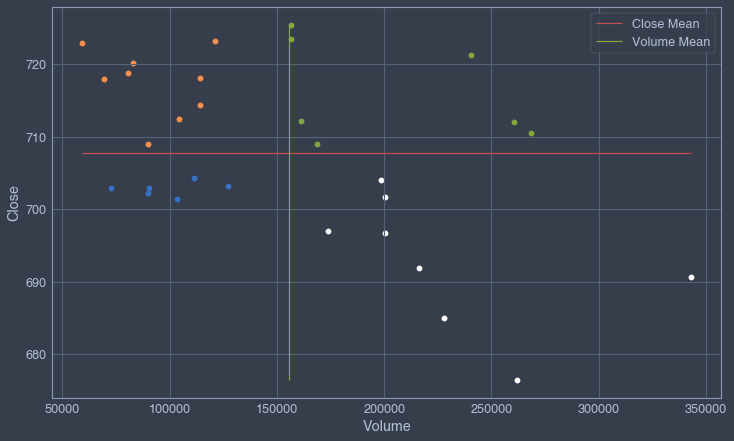

In [16]:
plt.hlines(close_mean,
           batch['Volume'].min(),
           batch['Volume'].max(),
           colors='r',
           label='Close Mean')
plt.vlines(volume_mean,
           batch['Close'].min(),
           batch['Close'].max(),
           colors='g',
           label='Volume Mean')
plt.scatter(batch[batch['class']=='HC_HV']['Volume'], batch[batch['class']=='HC_HV']['Close'], color='g')
plt.scatter(batch[batch['class']=='HC_LV']['Volume'], batch[batch['class']=='HC_LV']['Close'], color='y')
plt.scatter(batch[batch['class']=='LC_HV']['Volume'], batch[batch['class']=='LC_HV']['Close'], color='w')
plt.scatter(batch[batch['class']=='LC_LV']['Volume'], batch[batch['class']=='LC_LV']['Close'], color='b')
plt.xlabel('Volume')
plt.ylabel('Close')
plt.legend()
plt.show()

In [17]:
data[['Close', 'Volume']].corr()

,Close,Volume
Close,1.000000,-0.147108
Volume,-0.147108,1.000000


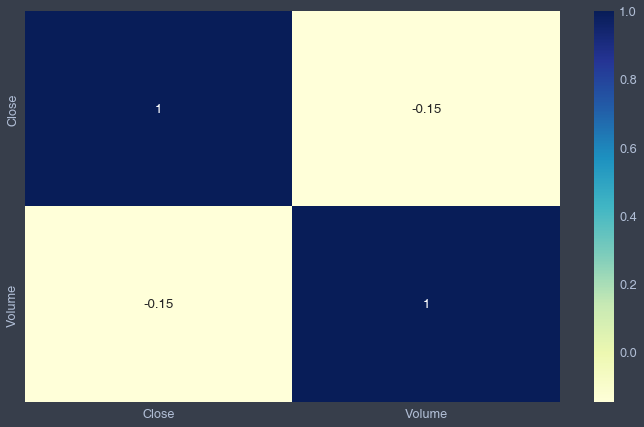

In [18]:
dataplot = sns.heatmap(data[['Close', 'Volume']].corr(), cmap="YlGnBu", annot=True)

In [19]:
lc_lv_count = batch[batch['class']=='LC_LV']['Close'].count()
hc_lv_count = batch[batch['class']=='HC_LV']['Close'].count()
lc_hv_count = batch[batch['class']=='LC_HV']['Close'].count()
hc_lv_count = batch[batch['class']=='HC_HV']['Close'].count()

print(f'LC_LV = {lc_lv_count}')
print(f'HC_LV = {hc_lv_count}')
print(f'LC_HV = {lc_hv_count}')
print(f'HC_HV = {hc_lv_count}')

LC_LV = 6
HC_LV = 7
LC_HV = 8
HC_HV = 7


Text(0.5, 1.0, 'Close batch(30) | Volume batch(30)')

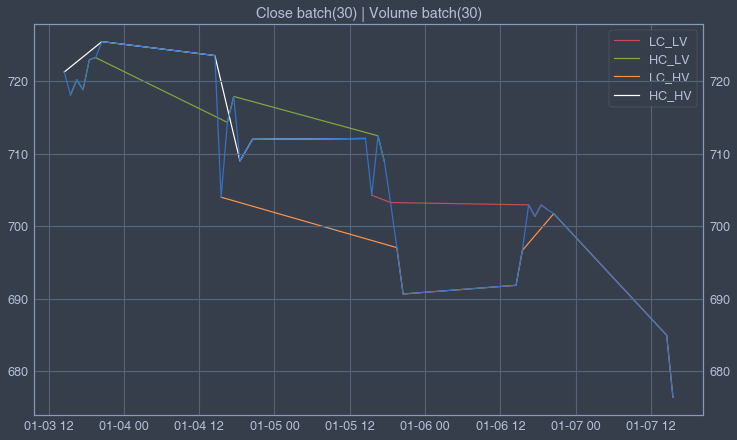

In [20]:
fig, ax = plt.subplots()
ax1 = ax.twinx()

ax.plot(batch[batch['class']=='LC_LV']['Close'], color='r', label='LC_LV')
ax.plot(batch[batch['class']=='HC_LV']['Close'], color='g', label='HC_LV')
ax.plot(batch[batch['class']=='LC_HV']['Close'], color='y', label='LC_HV')
ax.plot(batch[batch['class']=='HC_HV']['Close'], color='w', label='HC_HV')
ax1.plot(batch['Close'], color='b', label='Full')
# ax1.plot(batch['Volume'], color='g', label='Volume')
ax.legend(loc='upper right')
# ax1.legend(loc='upper right')
ax.set_title('Close batch(30) | Volume batch(30)')

In [21]:
batch[batch['class']=='HC_HV']['Close']

Datetime
2022-01-03 09:30:00-05:00    721.275024
2022-01-03 15:30:00-05:00    725.469971
2022-01-04 09:30:00-05:00    723.549988
2022-01-04 13:30:00-05:00    709.010010
2022-01-04 14:30:00-05:00    710.500000
2022-01-04 15:30:00-05:00    712.000000
2022-01-05 09:30:00-05:00    712.109985
Name: Close, dtype: float64

In [22]:
batch[batch['class']=='HC_LV']['Close']

Datetime
2022-01-03 10:30:00-05:00    718.112488
2022-01-03 11:30:00-05:00    720.200012
2022-01-03 12:30:00-05:00    718.821899
2022-01-03 13:30:00-05:00    722.974976
2022-01-03 14:30:00-05:00    723.260010
2022-01-04 11:30:00-05:00    714.330017
2022-01-04 12:30:00-05:00    717.909973
2022-01-05 11:30:00-05:00    712.479980
2022-01-05 12:30:00-05:00    708.984985
Name: Close, dtype: float64

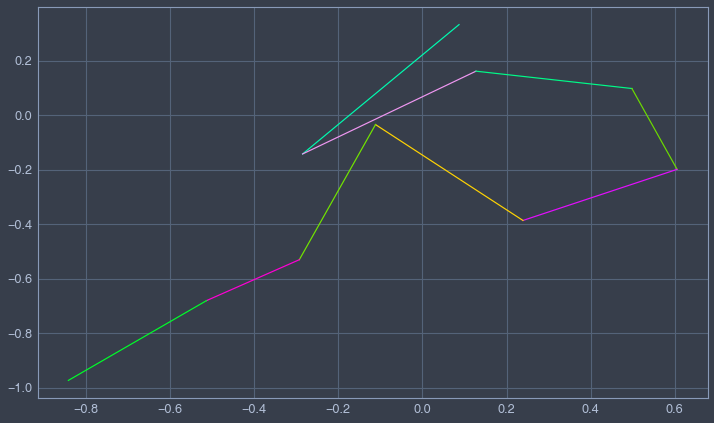

In [23]:
def uniqueish_color():
    """There're better ways to generate unique colors, but this isn't awful."""
    return plt.cm.gist_ncar(np.random.random())

xy = (np.random.random((10, 2)) - 0.5).cumsum(axis=0)

fig, ax = plt.subplots()
for start, stop in zip(xy[:-1], xy[1:]):
    x, y = zip(start, stop)
    ax.plot(x, y, color=uniqueish_color())
plt.show()

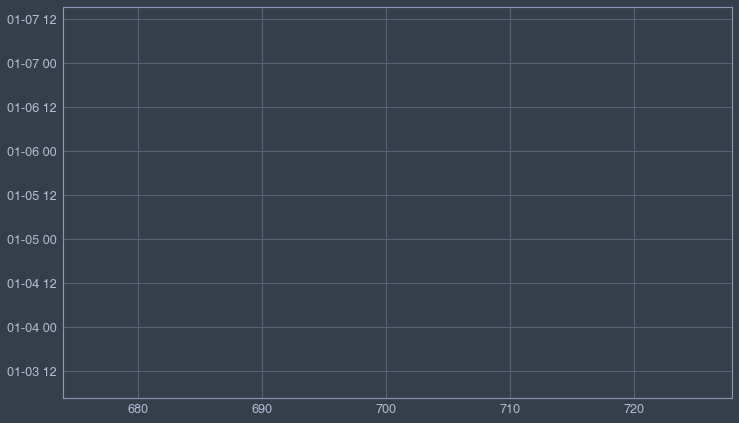

In [24]:
fig, ax = plt.subplots()
for p, d in zip(batch['Close'], batch.index):
#     print(batch[(batch['Close'] == p)]['class'].item() == 'HC_HV')
#     print(p)
    if batch[batch['Close'] == p]['class'].item() == 'HC_HV':
        ax.plot(p, d, color='r')
    elif batch[batch['Close'] == p]['class'].item() == 'LC_HV':
        ax.plot(p, d, color='g')
    elif batch[batch['Close'] == p]['class'].item() == 'HC_LV':
        ax.plot(p, d,  color='y')
    else:
        ax.plot(p, d,  color='w')
        

In [25]:
batch['Close'].index

DatetimeIndex(['2022-01-03 09:30:00-05:00', '2022-01-03 10:30:00-05:00',
               '2022-01-03 11:30:00-05:00', '2022-01-03 12:30:00-05:00',
               '2022-01-03 13:30:00-05:00', '2022-01-03 14:30:00-05:00',
               '2022-01-03 15:30:00-05:00', '2022-01-04 09:30:00-05:00',
               '2022-01-04 10:30:00-05:00', '2022-01-04 11:30:00-05:00',
               '2022-01-04 12:30:00-05:00', '2022-01-04 13:30:00-05:00',
               '2022-01-04 14:30:00-05:00', '2022-01-04 15:30:00-05:00',
               '2022-01-05 09:30:00-05:00', '2022-01-05 10:30:00-05:00',
               '2022-01-05 11:30:00-05:00', '2022-01-05 12:30:00-05:00',
               '2022-01-05 13:30:00-05:00', '2022-01-05 14:30:00-05:00',
               '2022-01-05 15:30:00-05:00', '2022-01-06 09:30:00-05:00',
               '2022-01-06 10:30:00-05:00', '2022-01-06 11:30:00-05:00',
               '2022-01-06 12:30:00-05:00', '2022-01-06 13:30:00-05:00',
               '2022-01-06 14:30:00-05:00', '2022-0

In [26]:
batch

,Close,Volume,class
Datetime,,,
2022-01-03 09:30:00-05:00,721.275024,240660,HC_HV
2022-01-03 10:30:00-05:00,718.112488,114249,HC_LV
2022-01-03 11:30:00-05:00,720.200012,82818,HC_LV
2022-01-03 12:30:00-05:00,718.821899,80495,HC_LV
2022-01-03 13:30:00-05:00,722.974976,59261,HC_LV
2022-01-03 14:30:00-05:00,723.260010,121219,HC_LV
2022-01-03 15:30:00-05:00,725.469971,156362,HC_HV
2022-01-04 09:30:00-05:00,723.549988,156737,HC_HV
2022-01-04 10:30:00-05:00,704.015015,198631,LC_HV


In [27]:
lc_lv_count = batch[batch['class']=='LC_LV']['Close'].count()
hc_lv_count = batch[batch['class']=='HC_LV']['Close'].count()
lc_hv_count = batch[batch['class']=='LC_HV']['Close'].count()
hc_lv_count = batch[batch['class']=='HC_HV']['Close'].count()

In [28]:
lc_lv_count, hc_lv_count, lc_hv_count, hc_lv_count

(6, 7, 8, 7)

In [29]:
-6/30*np.log2(6/30) - 7/30*np.log2(7/30) - 8/30*np.log2(8/30) - 7/30*np.log2(7/30)

1.952673092130171

In [30]:
-6/30*np.log4(6/30) - 7/30*np.log4(7/30) - 8/30*np.log4(8/30) - 7/30*np.log4(7/30)

AttributeError: module 'numpy' has no attribute 'log4'

In [32]:
-20/30*np.log2(20/30) - 3/30*np.log2(3/30) - 3/30*np.log2(3/30) - 4/30*np.log2(4/30)

1.4419460322060458

In [33]:
-27/30*np.log2(27/30) - 1/30*np.log2(1/30) - 1/30*np.log2(1/30) - 1/30*np.log2(1/30)

0.6274918436613969

In [34]:
-30/30*np.log2(30/30) - 0/30*np.log2(3/30) - 0/30*np.log2(3/30) - 0/30*np.log2(4/30)

0.0